In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tps
from sklearn.metrics import accuracy_score 

In [3]:
data = pd.read_csv('/Users/jarvis/pymycod/heart_disease_w_databse/heart.csv',delimiter=",")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
target_counts = data['target'].value_counts()
target_counts

1    526
0    499
Name: target, dtype: int64

In [10]:
data = data.dropna()

In [14]:
features = data.drop("target",axis=1)
Y = data["target"]

In [15]:
features = features.to_numpy()

In [17]:
X_train, X_test, Y_train, Y_test = tps(features , Y, test_size = 0.2, random_state = 65)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,random_state=65)
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200, random_state=65)

In [20]:
preds = model.predict(X_test)
acc = accuracy_score(Y_test,preds)

In [27]:
print(f"The testing accuracy of the model is: {round(acc*100,2)}%")

The testing accuracy of the model is: 98.54%


[Text(0, 0.5, 'Not Healthy'), Text(0, 1.5, 'Healthy')]

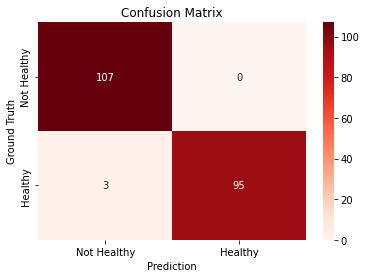

In [33]:
from sklearn.metrics import classification_report as cr 
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

confusion_matrix = cm(Y_test,preds)
ax = sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix")
ax.set_xlabel('Prediction')
ax.set_ylabel('Ground Truth')

ax.xaxis.set_ticklabels(['Not Healthy','Healthy'])
ax.yaxis.set_ticklabels(['Not Healthy','Healthy'])

In [34]:
print(cr(Y_test,preds))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       1.00      0.97      0.98        98

    accuracy                           0.99       205
   macro avg       0.99      0.98      0.99       205
weighted avg       0.99      0.99      0.99       205



In [35]:
from joblib import dump, load
dump(model, "/Users/jarvis/pymycod/heart_disease_w_databse/heart.joblib")

['/Users/jarvis/pymycod/heart_disease_w_databse/heart.joblib']

In [ ]:
smRf09oaMBDvJoxJ
mongodb+srv://namannanda0:<password>@cluster0.v5adu7w.mongodb.net/